## Astrology charts

In [67]:
df = pd.read_csv('/Users/paulamariaoliverpalmer/Desktop/Data Viz/dataviz_part1/df_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,4.0,8.0,4.0,2.0,5.0,6.0,NaN,NaN,NaN,NaN
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,2.0,9.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,NaN
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,3.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,9.0,7.0,8.0,7.0,9.0,4.0,5.0,7.0,8.0,6.0
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,8.0,5.0,8.0,9.0,10.0,10.0,1.0,NaN,NaN,NaN
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,2.0,5.0,3.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1) ⁠sun sign and job role


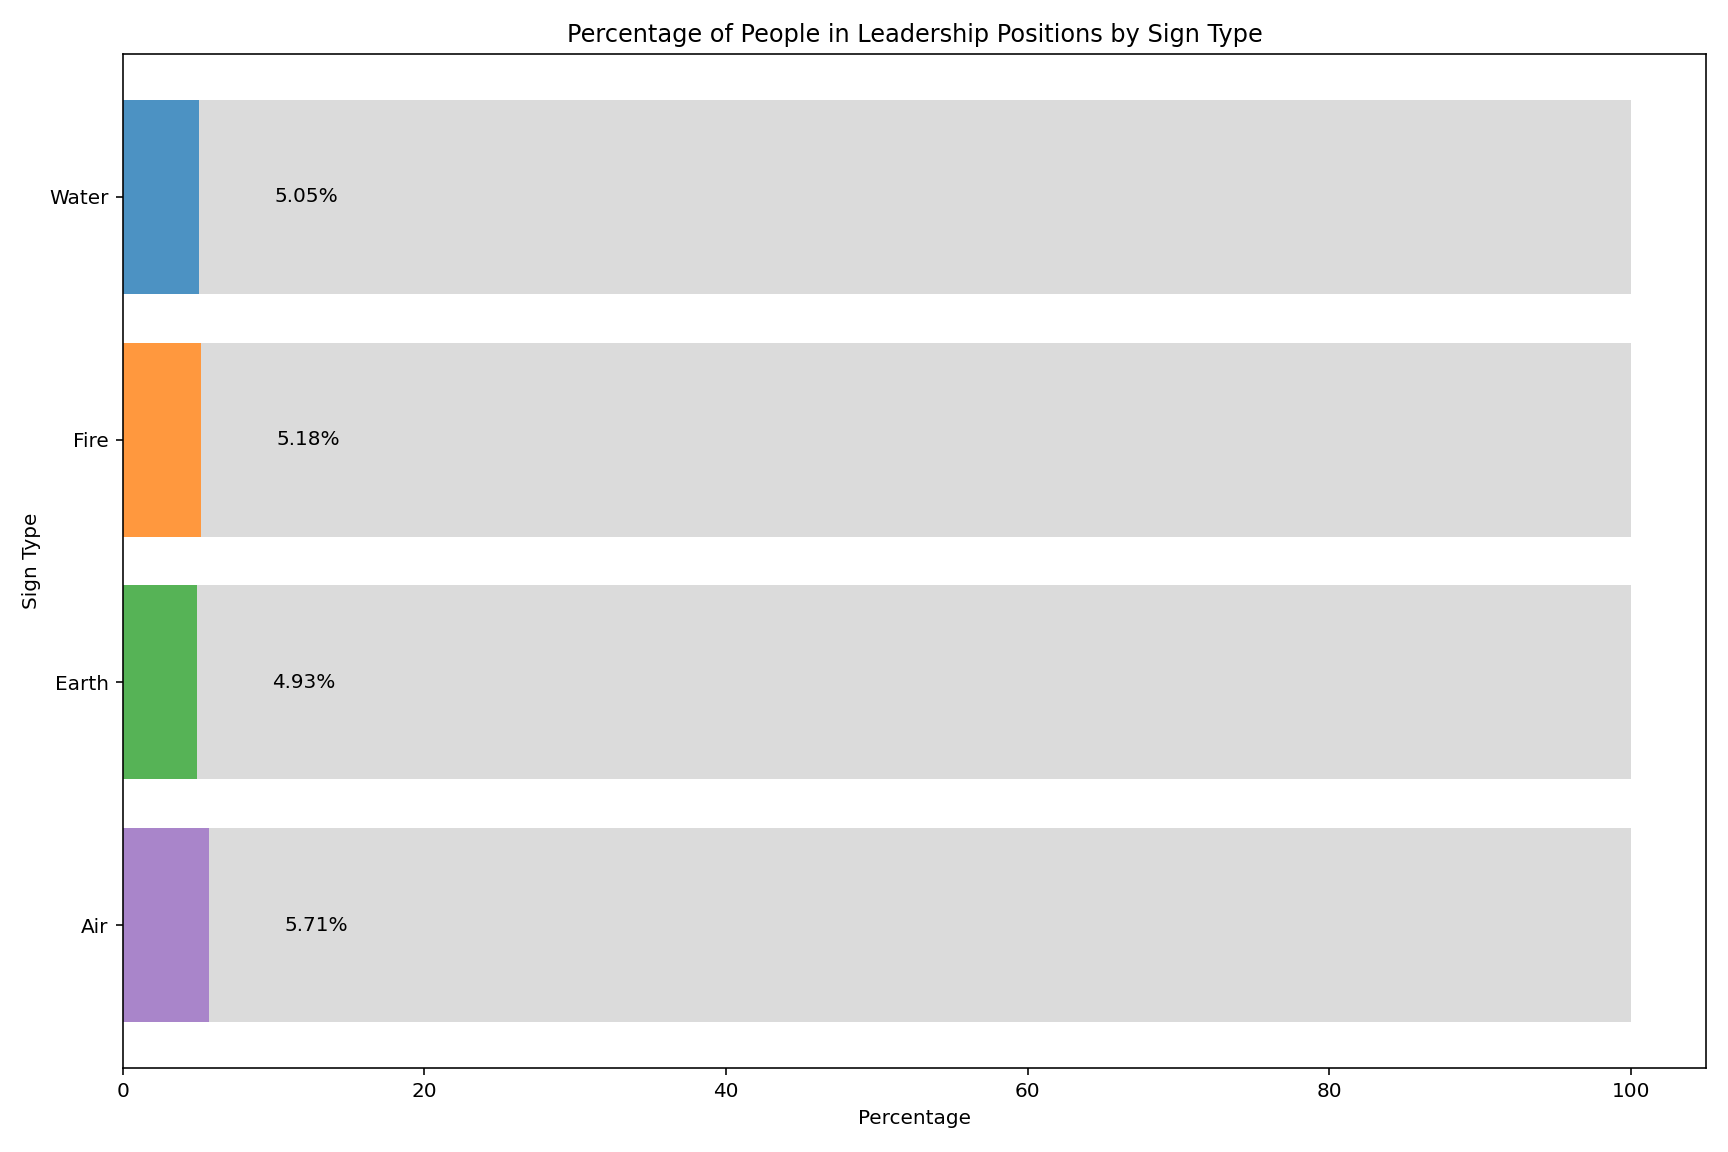

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Defining a variable that categorises into leadership postitions or not
leadership_keywords = ['Lead', 'Manager', 'Director', 'Head', 'Principal']
df['is_leadership'] = df['job_title'].apply(lambda x: any(keyword in x for keyword in leadership_keywords))


# Calculate the % of leadership roles for each sign type
leadership_by_sign_type = df.groupby('sign_type')['is_leadership'].value_counts(normalize=True).unstack() * 100
leadership_percentages_filtered = leadership_by_sign_type[True]  # Assuming True represents leadership roles

#Calculate the  % of non-leadership roles
leadership_percentages_non_leadership = 100 - leadership_percentages_filtered

#choose and map pretty colours
sign_colors = {
    'Fire': '#ff7f0e',  # Orange
    'Water': '#1f77b4',  # Blue
    'Air': '#9467bd',    # Purple
    'Earth': '#2ca02c'   # Green
}

colors_filtered = [sign_colors[sign] for sign in leadership_percentages_filtered.index]

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the leadership percentage
bars = ax.barh(leadership_percentages_filtered.index, leadership_percentages_filtered, color=[colors_filtered[i] for i in range(len(leadership_percentages_filtered))], alpha=0.8, label='Leadership')

# Add the non-leadership percentage with lighter grey to fill up to 100%
ax.barh(leadership_percentages_filtered.index, leadership_percentages_non_leadership, left=leadership_percentages_filtered, color='lightgrey', alpha=0.8, label='Non-Leadership')

# Annotating percentages on the bars for leadership positions
for bar, value in zip(bars, leadership_percentages_filtered):
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height() / 2, f'{value:.2f}%', va='center')

# Setting titles and labels
ax.set_title('Percentage of People in Leadership Positions by Sign Type')
ax.set_xlabel('Percentage')
ax.set_ylabel('Sign Type')



plt.tight_layout()
plt.show()

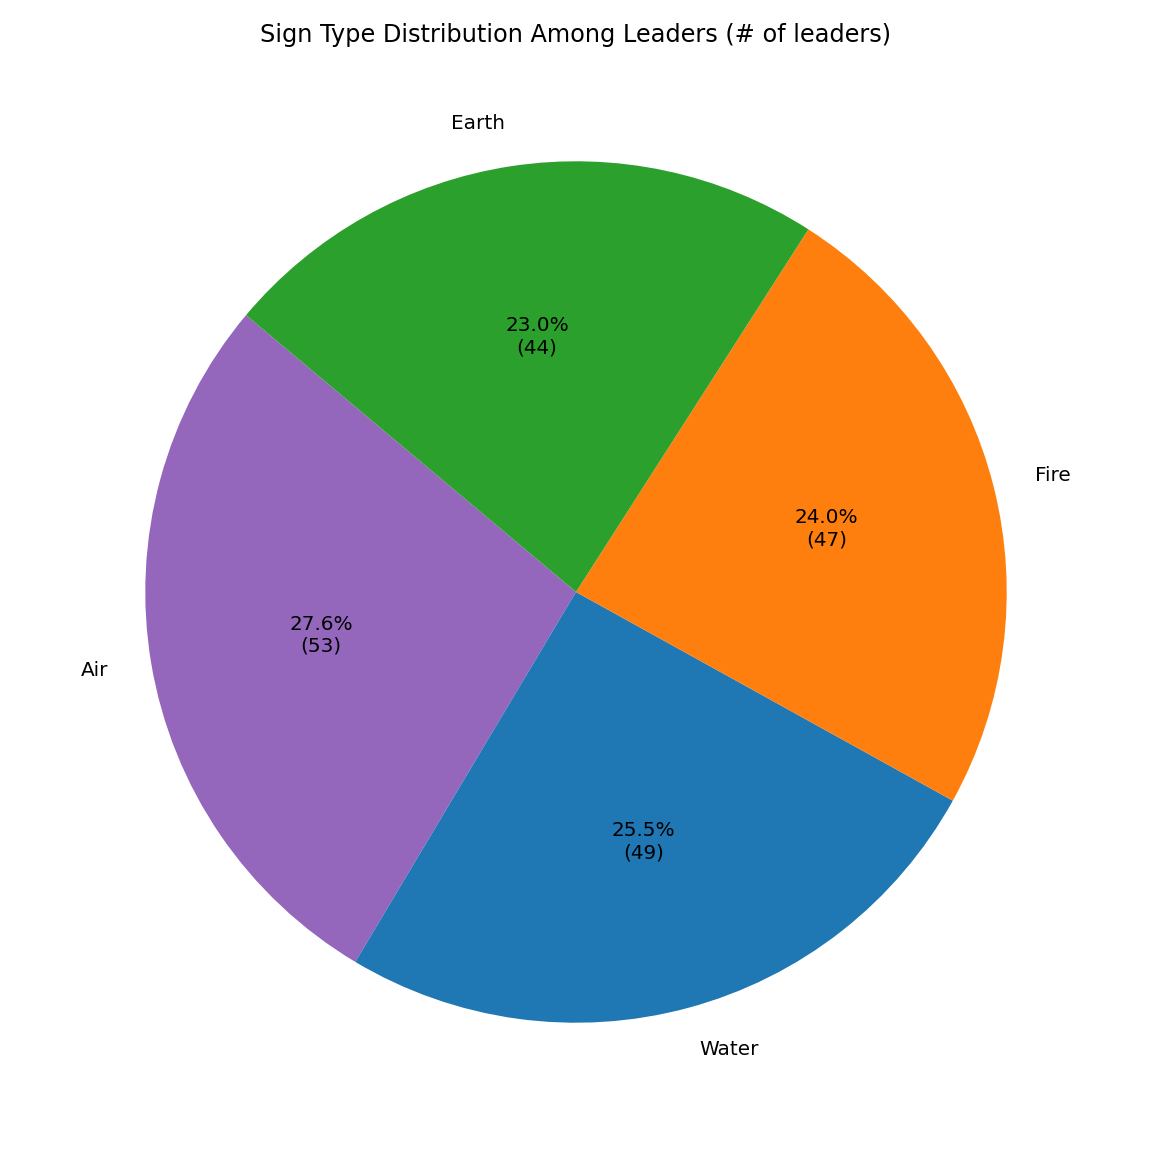

sign_type
Air      54
Water    50
Fire     47
Earth    45
Name: count, dtype: int64

In [69]:
# Calculate the number of leaders for each sign type
leaders_count_by_sign_type = df[df['is_leadership']]['sign_type'].value_counts()

# Exclude 'Other' from the leaders count if present
leaders_count_by_sign_type_filtered = leaders_count_by_sign_type.drop('Other', errors='ignore')

# Prepare the pie chart with filtered data
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(leaders_count_by_sign_type_filtered, labels=leaders_count_by_sign_type_filtered.index, autopct=lambda p: '{:.1f}%\n({:d})'.format(p, int(p/100.*leaders_count_by_sign_type_filtered.sum())), startangle=140, colors=[sign_colors[sign] for sign in leaders_count_by_sign_type_filtered.index])

# Setting the title
ax.set_title('Sign Type Distribution Among Leaders (# of leaders)')

plt.tight_layout()
plt.show()

# Displaying the number of leaders for each sign type for reference
leaders_count_by_sign_type_filtered



### 2) ⁠⁠sun sign and job type

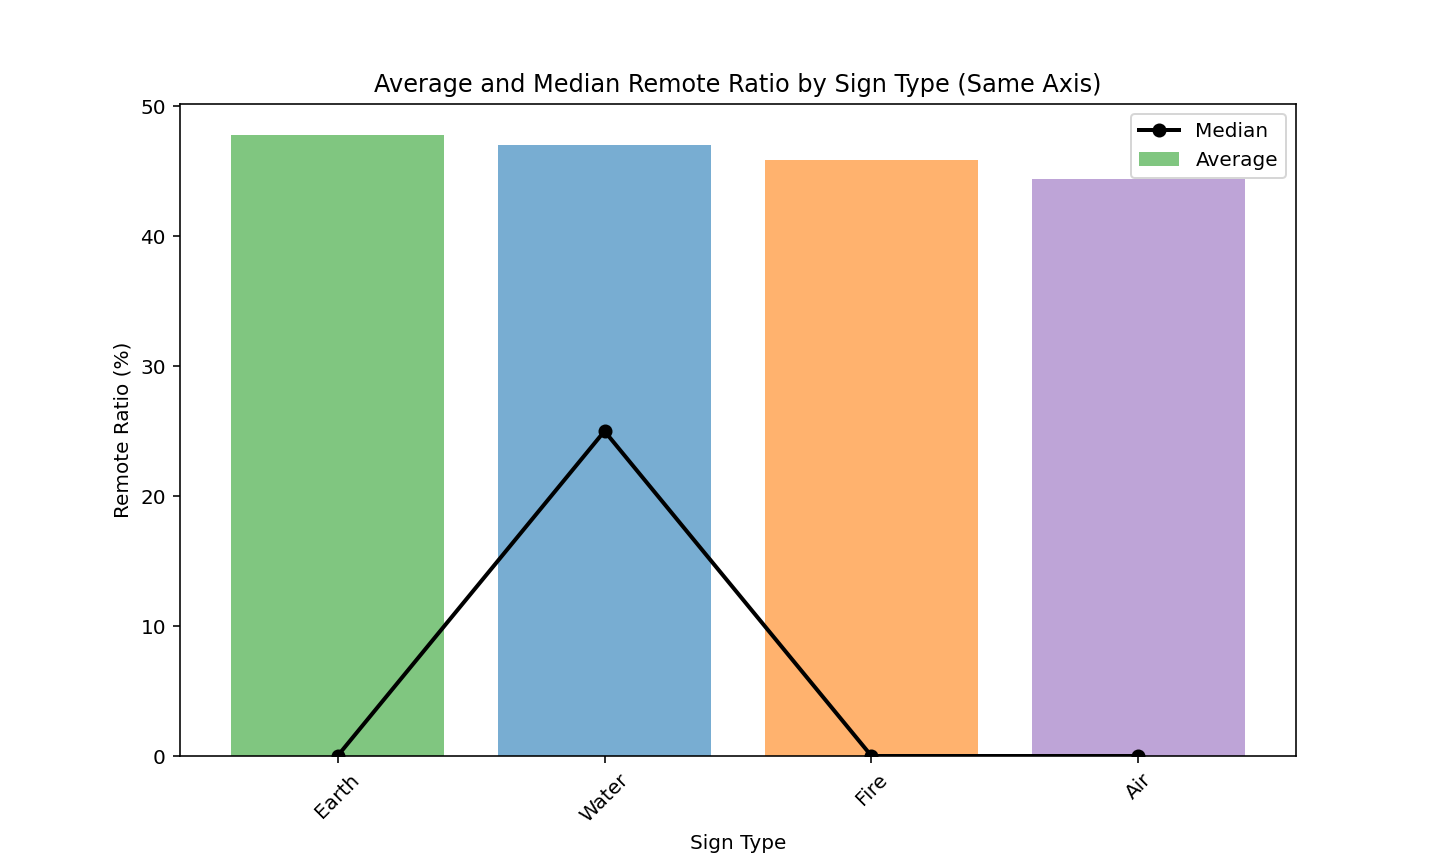

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Define your sign colors
sign_colors = {
    'Fire': '#ff7f0e',  # Orange
    'Water': '#1f77b4',  # Blue
    'Air': '#9467bd',    # Purple
    'Earth': '#2ca02c'   # Green
}

# Calculate the average and median remote_ratio for each sign type
average_remote_ratio_by_sign_type = df.groupby('sign_type')['remote_ratio'].mean().sort_values(ascending=False)
median_remote_ratio_by_sign_type = df.groupby('sign_type')['remote_ratio'].median().reindex(average_remote_ratio_by_sign_type.index)

# Adjusting the visualization to use the same axis for both average and median remote_ratio
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for average remote_ratio
bars = ax.bar(average_remote_ratio_by_sign_type.index, average_remote_ratio_by_sign_type, color=[sign_colors[sign] for sign in average_remote_ratio_by_sign_type.index], alpha=0.6, label='Average')

# Line graph for median remote_ratio on the same axis
ax.plot(median_remote_ratio_by_sign_type.index, median_remote_ratio_by_sign_type, marker='o', color='black', linewidth=2, label='Median')

# Titles and labels
plt.title('Average and Median Remote Ratio by Sign Type (Same Axis)')
ax.set_xlabel('Sign Type')
ax.set_ylabel('Remote Ratio (%)')
plt.xticks(rotation=45)

# Legend
ax.legend()

plt.show()


### 3) Jupyter in the 10th House

In [71]:
#⁠⁠Jupyter in the 10th house is associated with abundance (and more money) compare it with the performance of the other houses
# Identify the top 10 most common job positions
top_10_positions = df['job_title'].value_counts().head(10).index.tolist()

# Filter the dataset for these top 10 positions
df_top_10_positions = df[df['job_title'].isin(top_10_positions)]

# Verify the top 10 positions and their count
top_10_positions_count = df['job_title'].value_counts().head(10)
top_10_positions_count




job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: count, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior


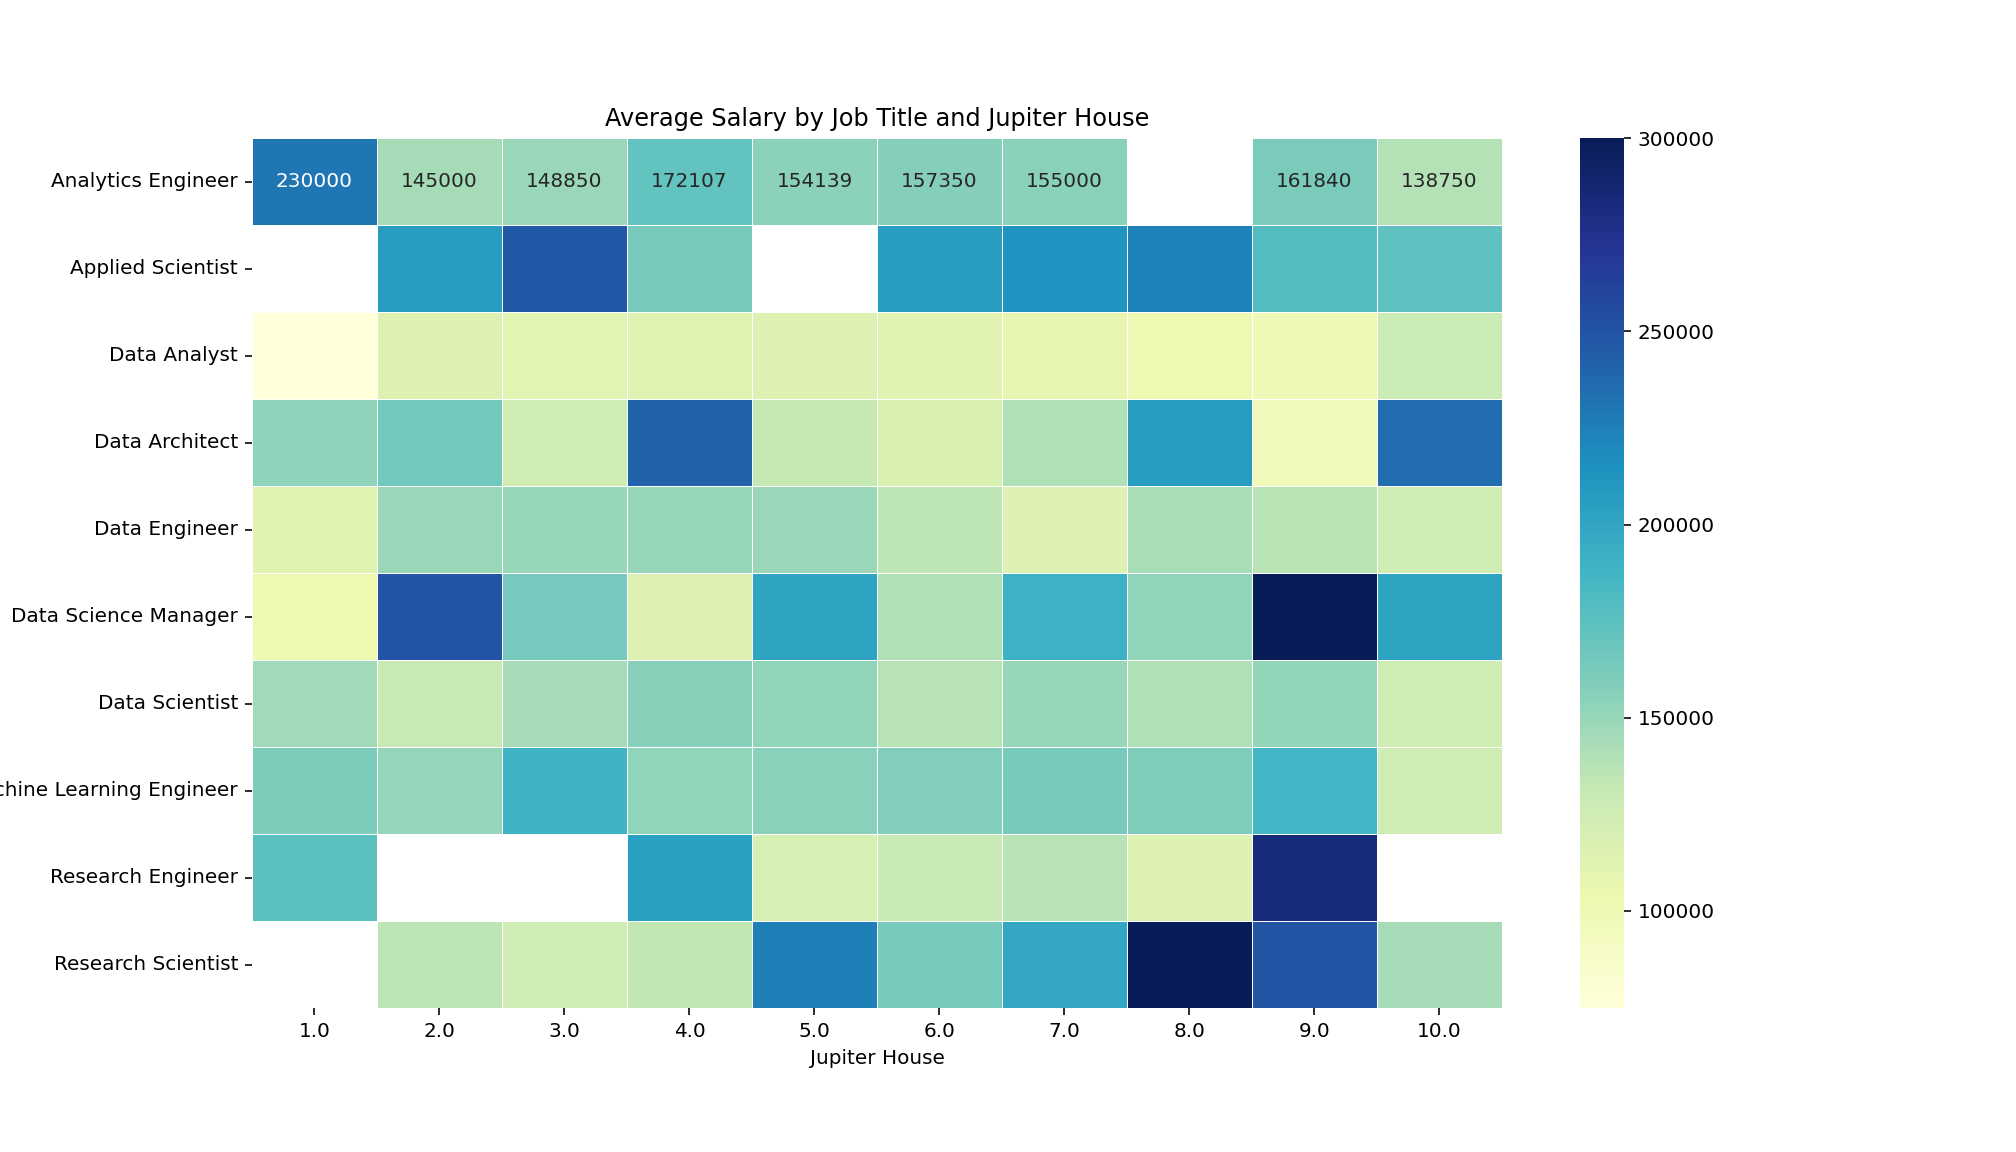

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the top 10 most common job positions
top_10_positions = df['job_title'].value_counts().head(10).index.tolist()

# Filter the dataset for these top 10 positions
df_top_10_positions = df[df['job_title'].isin(top_10_positions)]

# Aggregate the data to calculate the average salary for each combination of job position and Jupiter's house
salary_by_position_jupiter = df_top_10_positions.pivot_table(values='salary_in_usd', index='job_title', columns='Jupiter', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(salary_by_position_jupiter, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)

plt.title('Average Salary by Job Title and Jupiter House')
plt.xlabel('Jupiter House')
plt.ylabel('Job Title')

plt.show()


### 4)  ⁠⁠Mercury in the 6th House

In [73]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender', 'birthday', 'sun_sign', 'moon_sign', 'ascendant_sign',
       'sign_type', 'Sun', 'Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto', 'is_leadership'],
      dtype='object')

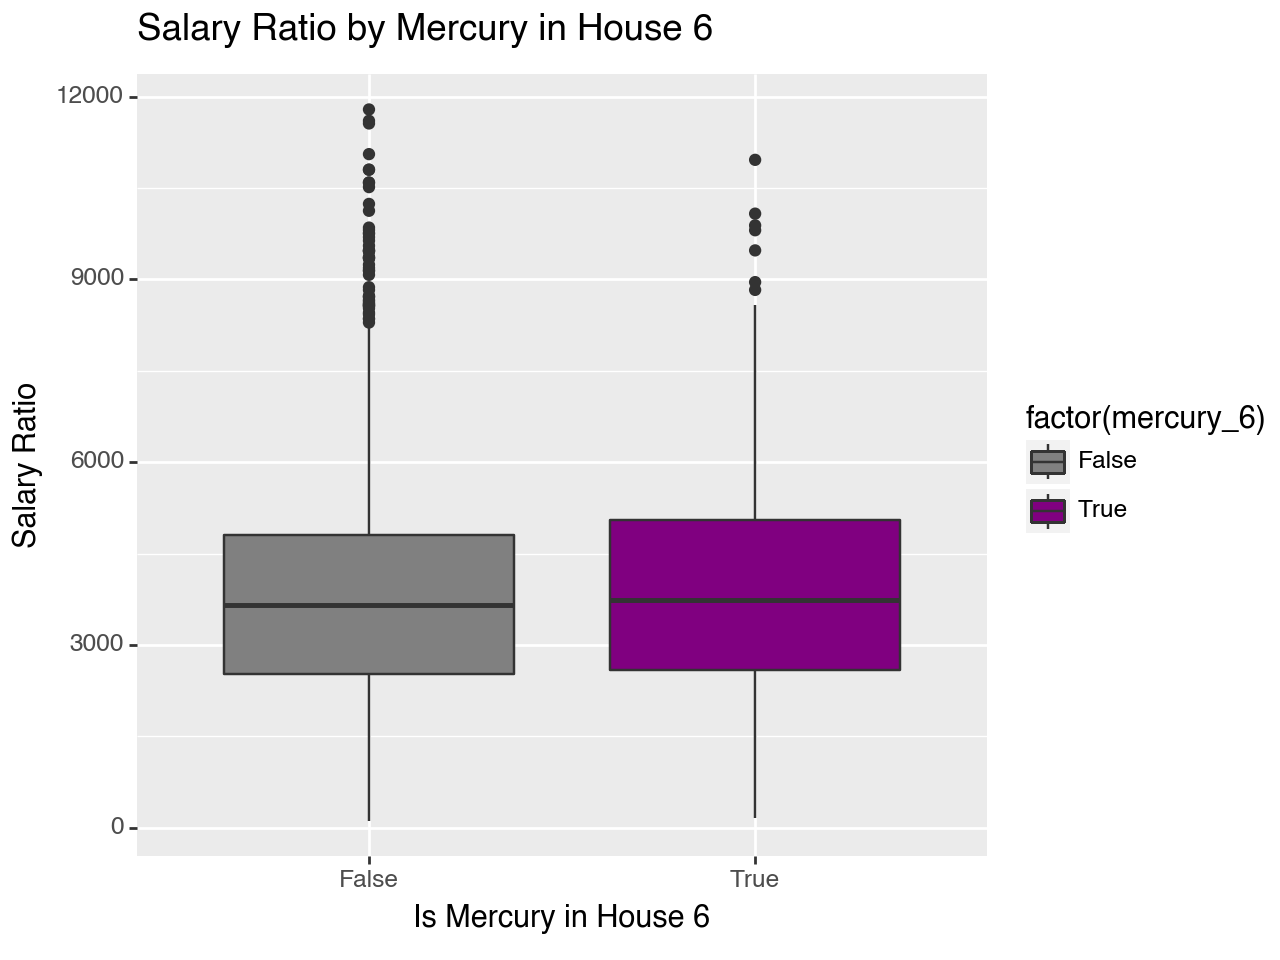

In [74]:
from plotnine import ggplot, aes, geom_boxplot, labs, scale_fill_manual

#create binary variable that is mercury_6
df['mercury_6'] = df['Mercury'] == 6

# Create the salary_ratio variable
df['salary_ratio'] = df['salary_in_usd'] / df['weekly_hours']

# Create a box plot using plotnine
plot = (
    ggplot(df, aes(x='factor(mercury_6)', y='salary_ratio', fill='factor(mercury_6)')) +
    geom_boxplot() +
    scale_fill_manual(values={ False: "grey", True: "purple"}) +  # Custom colors
    labs(
        title='Salary Ratio by Mercury in House 6',
        x='Is Mercury in House 6',
        y='Salary Ratio'
    )
)

# Display the plot
print(plot)


### 5) ⁠  ⁠⁠Mars in the 6th or 10th

In [75]:
# Create a violin plot with custom colors
plt.figure(figsize=(10, 6))
sns.violinplot(x='Mars_6th_or_10th', y='weekly_hours', data=df,
               palette={'Mars in 6th or 10th House': 'purple', 'No Mars in 6th or 10th House': 'grey'})

# Add labels and title
plt.xlabel('Mars Placement')
plt.ylabel('Weekly Hours Worked')
plt.title('Distribution of Weekly Hours Worked by Mars Placement')

# Show the plot
plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'Mars_6th_or_10th'

<Figure size 720x432 with 0 Axes>

### 6) Ascendants

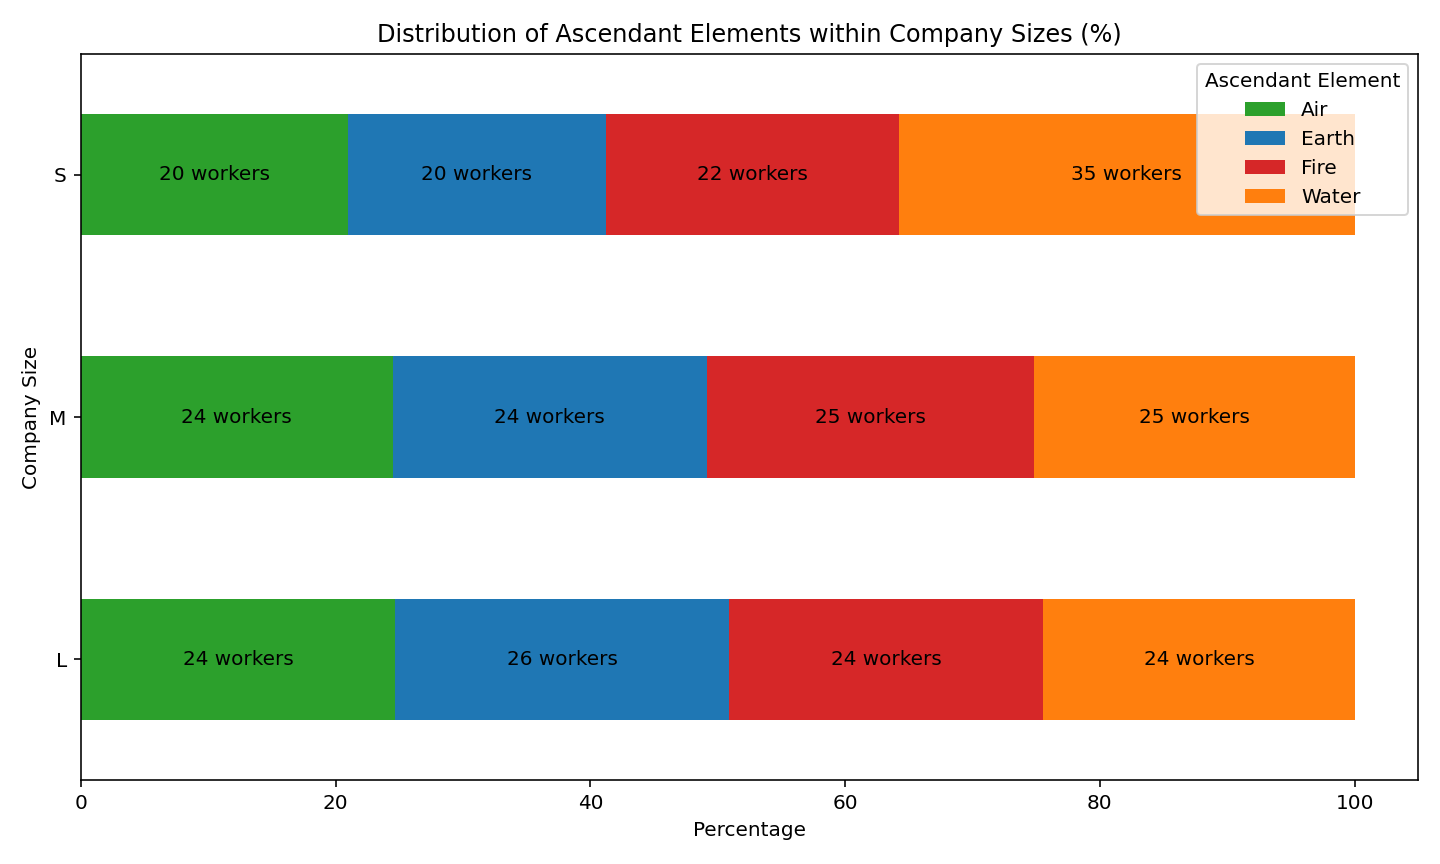

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the count of ascendant elements within each company size
element_distribution = df.groupby(['company_size', 'ascendant_element']).size().unstack(fill_value=0)

# Calculate the percentage distribution of ascendant elements within each company size
element_percentage = element_distribution.div(element_distribution.sum(axis=1), axis=0) * 100

# Plotting the percentage distribution as a horizontal stacked bar plot
ax = element_percentage.plot(kind='barh', stacked=True, figsize=(10, 6),
                             color={'Earth': '#1f77b4', 'Water': '#ff7f0e', 'Air': '#2ca02c', 'Fire': '#d62728'})
plt.title('Distribution of Ascendant Elements within Company Sizes (%)')
plt.xlabel('Percentage')
plt.ylabel('Company Size')
plt.legend(title='Ascendant Element')
plt.tight_layout()

# Annotate each bar with the number of employees and the word "workers"
for bars in ax.containers:
    # Custom function to format the label
    labels = [f'{int(v.get_width())} workers' if v.get_width() > 0 else '' for v in bars]
    ax.bar_label(bars, labels=labels, label_type='center')

# Show the plot
plt.show()


## 7) Salaries